支出： 21597233 元
收入： 21791644 元
淨收益： 194411 元
投資報酬率： 0.9 %


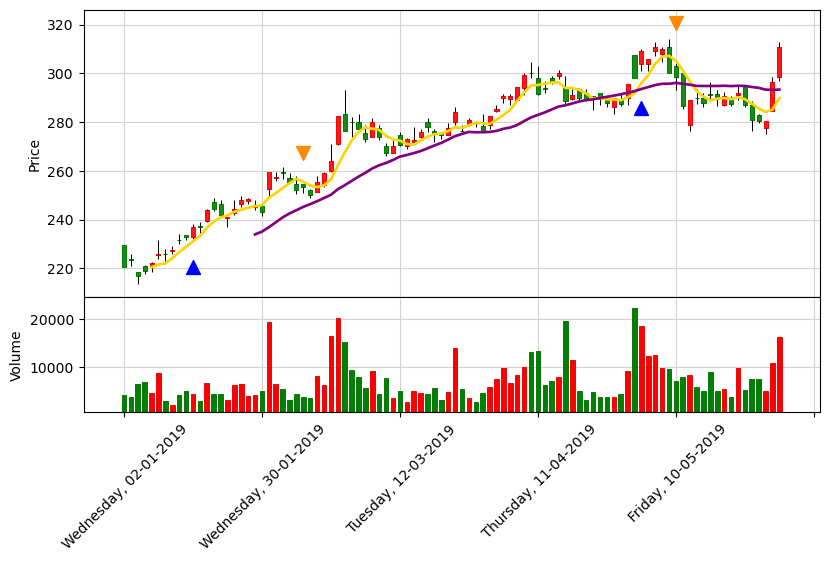

,0,1,2,3,4,5
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利
1,2019/1/16,+1,237.0,237.3,-237338,-237338
2,2019/2/18,-1,253.5,252,+252378,15040
3,2019/5/3,+1,309.0,309.4,-309440,-294400
4,2019/5/10,-1,298.5,297,+297179,2779
...,...,...,...,...,...,...
64,2021/10/29,-1,913.0,909,+908960,96744
65,2021/11/5,+1,940.0,941.3,-941340,-844596
66,2021/11/24,-1,1040.0,1035,+1035398,190802
67,2021/12/6,+1,1085.0,1086.5,-1086546,-895744


In [5]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Coding\10_VIP\data\2454.csv")

def make_ma(_num):
    for i in range(_num - 1, len(df)):
        df.loc[i, "MA"+ str(_num)] = (sum(df['Close'][i - _num + 1 : i + 1]) / _num)

make_ma(5)
make_ma(10)
make_ma(20)

# print(df)

# #繪製買賣點所使用的串列 (初始化)
# points_buy = [np.nan] * len(df)    #買入點
# points_sell = [np.nan] * len(df)   #賣出點
n = 0
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利']]
gain = 0
temp = []

for i in range(3, len(df)):
    if(n == 0 and (df["MA5"].iloc[i] - df["MA5"].iloc[i - 1]) / df["MA5"].iloc[i - 1] > 0.005 
        and ((df.loc[i, "Close"] - df.loc[i, "Open"]) / df.loc[i - 1, "Close"]) > 0
        and ((df.loc[i - 1, "Close"] - df.loc[i - 1, "Open"]) / df.loc[i - 2, "Close"]) < 0):
        n = 1
        df.loc[i, "points_buy"] = df["Low"].iloc[i] * 0.95
        gain -= round(df.loc[i, "Close"] * 1.001425 * n * 1000)
        temp.append(df.loc[i, 'Date'])
        temp.append('+' + str(n))                                            #買賣 unit張，這邊假設為 1
        temp.append(df.loc[i, "Close"])                                            #購買日買入價格，這邊假設為收盤價
        temp.append(round(df.loc[i, "Close"] * 1.001425, 1))                       #抽稅之後的價格
        temp.append('-' + str(round(df.loc[i, "Close"] * 1.001425 * n * 1000))) #實際花費 (四捨五入到個位數)
        temp.append(gain)                                                       #目前獲利
        detail.append(temp)                                                     #紀錄交易資訊至正是表格中
        temp = []   

    elif(n == 1 and (df["Close"].iloc[i] < df["MA5"].iloc[i]) and (df["Close"].iloc[i - 1] < df["MA5"].iloc[i - 1])):
        df.loc[i, "points_sell"] = df["High"].iloc[i] * 1.05
        gain += round(df.loc[i, "Close"] * 0.995575 * n * 1000)
        temp.append(df.loc[i, 'Date'])
        temp.append('-' + str(n))                                           #股票全部賣出
        temp.append(df.loc[i, "Close"])                                            #賣出日賣出價格，這邊假設為收盤價
        temp.append(round(df.loc[i, "Close"] * 0.995575))                          #抽稅之後的價格
        temp.append('+' + str(round(df.loc[i, "Close"] * 0.995575 * n * 1000)))#實際收入 (四捨五入到個位數)
        temp.append(gain)                                                       #目前獲利                                                             #因為全部股票賣出，所以當前股票張數歸零
        detail.append(temp)
        n = 0
        temp = []

    if n == 1 and i == len(df) - 1:
        df.loc[i, "points_sell"] = df["High"].iloc[i] * 1.05
        gain += round(df.loc[i, "Close"] * 0.995575 * n * 1000)
        temp.append(df.loc[i, 'Date'])
        temp.append('-' + str(n))                                           #股票全部賣出
        temp.append(df.loc[i, "Close"])                                     #賣出日賣出價格，這邊假設為收盤價
        temp.append(round(df.loc[i, "Close"] * 0.995575))                          #抽稅之後的價格
        temp.append('+' + str(round(df.loc[i, "Close"] * 0.995575 * n * 1000)))#實際收入 (四捨五入到個位數)
        temp.append(gain)                                                       #目前獲利                                                             #因為全部股票賣出，所以當前股票張數歸零
        detail.append(temp)
        n = 0
        temp = []

cost = 0

#收入
income = 0

for i in range(1, len(detail)):
    #支出總和
    if(float(detail[i][4]) < 0):
        cost += abs(int(detail[i][4])) #取絕對值
    #收入總和
    elif(float(detail[i][4]) > 0):
        income += int(detail[i][4])
        
#支出、收入、淨收益、投資報酬率
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")


df.index = pd.DatetimeIndex(df["Date"])  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

# print(df)

df = df.loc["2019-01":"2019-05", :]
# mpf.figure(num=1, figsize=(15, 18))
# 設置k線圖顏色
my_color = mpf.make_marketcolors(up='red',  # 上漲
                                 down='green',  # 下跌
                                 edge='i',  # 隱藏K線邊緣，或是'inherit'
                                 volume='in',  # 成交量用同樣的顏色，或設定為'inherit' 
                                 inherit=False, wick={'up':'black', 'down':'black'})

my_style = mpf.make_mpf_style(gridaxis='both',  # 設置網格
                              gridstyle='-',
                              y_on_right=False,
                              marketcolors=my_color, gridcolor="lightgray")


#點狀圖 type = 'scatter'，markersize可以更改 marker大小
addplots = [
            mpf.make_addplot(df["points_buy"], type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(df["points_sell"], type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(df["MA5"], color = 'gold'),
            # mpf.make_addplot(df["MA10"], color = 'blue'),
            mpf.make_addplot(df["MA20"], color = 'purple')
           ]

mpf.plot(df, type="candle", mav=(5, 20),  addplot=addplots,
         volume=True, style=my_style, show_nontrading=False,
         figratio=(16, 9), figscale=1, ylabel="Price", ylabel_lower="Volume", 
         title="", tight_layout=False, datetime_format=' %A, %d-%m-%Y', xrotation=45,
         scale_width_adjustment=dict(volume=0.7,candle=1.2))

detail = pd.DataFrame(detail)
detail

支出： 390415 元
收入： 523425 元
淨收益： 133010 元
投資報酬率： 34.07 %


C:\ProgramData\Anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


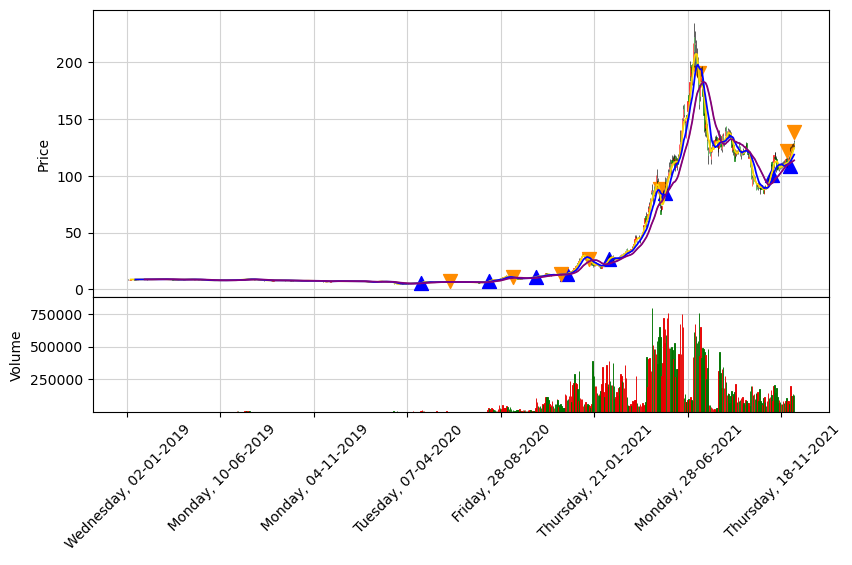

,0,1,2,3,4,5
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利
1,2020/4/28,+1,6.25,6.3,-6259,-6259
2,2020/6/11,-1,6.54,7,+6511,252
3,2020/8/11,+1,7.81,7.8,-7821,-7569
4,2020/9/16,-1,9.81,10,+9767,2198
5,2020/10/26,+1,12.1,12.1,-12117,-9919
6,2020/12/2,-1,12.9,13,+12843,2924
7,2020/12/10,+1,14.35,14.4,-14370,-11446
8,2021/1/13,-1,24.0,24,+23894,12448
9,2021/2/23,+1,28.25,28.3,-28290,-15842


In [4]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Coding\10_VIP\data\2609.csv")

def make_ma(_num):
    for i in range(_num - 1, len(df)):
        df.loc[i, "MA"+ str(_num)] = (sum(df['Close'][i - _num + 1 : i + 1]) / _num)

make_ma(5)
make_ma(10)
make_ma(20)

# print(df)

n = 0
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利']]
gain = 0
temp = []



for i in range(3, len(df)):
    # 買入策略 : 五日均線大於十日均線大於二十日均線，且五日及二十日均線的漲幅往上且大於一定比例
    if(n == 0 and df.loc[i, "MA5"] > df.loc[i, "MA10"] > df.loc[i, "MA20"]
        and ((df.loc[i, "MA5"] - df.loc[i - 1, "MA5"]) / df.loc[i - 1, "MA5"]) > 0.01
        and ((df.loc[i, "MA20"] - df.loc[i - 1, "MA20"]) / df.loc[i - 1, "MA20"]) > 0.007):
        n = 1
        df.loc[i, "points_buy"] = df["Low"].iloc[i] * 0.95
        gain -= round(df.loc[i, "Close"] * 1.001425 * n * 1000)
        temp.append(df.loc[i, 'Date'])
        temp.append('+' + str(n))                                            #買賣 unit張，這邊假設為 1
        temp.append(df.loc[i, "Close"])                                            #購買日買入價格，這邊假設為收盤價
        temp.append(round(df.loc[i, "Close"] * 1.001425, 1))                       #抽稅之後的價格
        temp.append('-' + str(round(df.loc[i, "Close"] * 1.001425 * n * 1000))) #實際花費 (四捨五入到個位數)
        temp.append(gain)                                                       #目前獲利
        detail.append(temp)                                                     #紀錄交易資訊至正是表格中
        temp = []   
    # 賣出時機為股價跌破二十日均線時
    elif(n == 1 and df.loc[i, "Close"] < df.loc[i, "MA20"]):
        df.loc[i, "points_sell"] = df["High"].iloc[i] * 1.05
        gain += round(df.loc[i, "Close"] * 0.995575 * n * 1000)
        temp.append(df.loc[i, 'Date'])
        temp.append('-' + str(n))                                           #股票全部賣出
        temp.append(df.loc[i, "Close"])                                            #賣出日賣出價格，這邊假設為收盤價
        temp.append(round(df.loc[i, "Close"] * 0.995575))                          #抽稅之後的價格
        temp.append('+' + str(round(df.loc[i, "Close"] * 0.995575 * n * 1000)))#實際收入 (四捨五入到個位數)
        temp.append(gain)                                                       #目前獲利                                                             #因為全部股票賣出，所以當前股票張數歸零
        detail.append(temp)
        n = 0
        temp = []

    if n == 1 and i == len(df) - 1:
        df.loc[i, "points_sell"] = df["High"].iloc[i] * 1.05
        gain += round(df.loc[i, "Close"] * 0.995575 * n * 1000)
        temp.append(df.loc[i, 'Date'])
        temp.append('-' + str(n))                                           #股票全部賣出
        temp.append(df.loc[i, "Close"])                                            #賣出日賣出價格，這邊假設為收盤價
        temp.append(round(df.loc[i, "Close"] * 0.995575))                          #抽稅之後的價格
        temp.append('+' + str(round(df.loc[i, "Close"] * 0.995575 * n * 1000)))#實際收入 (四捨五入到個位數)
        temp.append(gain)                                                       #目前獲利                                                             #因為全部股票賣出，所以當前股票張數歸零
        detail.append(temp)
        n = 0
        temp = []

cost = 0

#收入
income = 0

for i in range(1, len(detail)):
    #支出總和
    if(float(detail[i][4]) < 0):
        cost += abs(int(detail[i][4])) #取絕對值
    #收入總和
    elif(float(detail[i][4]) > 0):
        income += int(detail[i][4])
        
#支出、收入、淨收益、投資報酬率
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")


df.index = pd.DatetimeIndex(df["Date"])  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

# print(df)

df = df.loc["2019-01":"2021-12", :]
# mpf.figure(num=1, figsize=(15, 18))
# 設置k線圖顏色
my_color = mpf.make_marketcolors(up='red',  # 上漲
                                 down='green',  # 下跌
                                 edge='i',  # 隱藏K線邊緣，或是'inherit'
                                 volume='in',  # 成交量用同樣的顏色，或設定為'inherit' 
                                 inherit=False, wick={'up':'black', 'down':'black'})

my_style = mpf.make_mpf_style(gridaxis='both',  # 設置網格
                              gridstyle='-',
                              y_on_right=False,
                              marketcolors=my_color, gridcolor="lightgray")


#點狀圖 type = 'scatter'，markersize可以更改 marker大小
addplots = [
            mpf.make_addplot(df["points_buy"], type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(df["points_sell"], type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(df["MA5"], color = 'gold'),
            mpf.make_addplot(df["MA10"], color = 'blue'),
            mpf.make_addplot(df["MA20"], color = 'purple')
           ]

mpf.plot(df, type="candle", mav=(5, 20),  addplot=addplots,
         volume=True, style=my_style, show_nontrading=False,
         figratio=(16, 9), figscale=1, ylabel="Price", ylabel_lower="Volume", 
         title="", tight_layout=False, datetime_format=' %A, %d-%m-%Y', xrotation=45,
         scale_width_adjustment=dict(volume=0.7,candle=1.2))

detail = pd.DataFrame(detail)
detail